

# Assignment explain numpy.random package

![numpylogo](img/numpy.jpeg)



## Why are random numbers needed? 

The ability to generate random numbers has many useful applications. Say a researcher is interested in the effectiveness of a new ulcer drug. The population of interest is every person with ulcers. It would impractically costly and time-consuming contact everyone with ulcers, give them the drug and then compare before and after reports. Indeed, the population of people with ulcers as a total population would be impossible to judge as many people may have ulcers without ever seeking treatment.

## Why take samples?
The researcher needs to take a sample from this population. This sample should be big enough and diverse enough so that it fairly represents the wider population. The sample data is used to make **generalisations** about its population. For example, the drug’s effectiveness in a sample containing only men with ulcers aged seventy or over is unlikely to represent its effectiveness on women half that age. Sampling involves taking a sufficiently sized subset of a given population that accurately reflects the phenomena under investigation so that information from the sample can be used to infer things from the overall population. It is vital then that *the sample shares the same characteristics as its target population*. 

## Problems with picking samples 
Picking samples that represent a population is prone to **biases**. For example, if asked to pick a number at random between 1 and 10 there will be far more 3's and 7's than would be expected if the choice was truly random [ref](https://micro.magnet.fsu.edu/creatures/pages/random.html).

One way to reduce sampling bias is to use **random sampling**. Random sampling means that every item in the target population has an *equal* chance of being selected. In the example above, the target population would be the numbers between 1 and 10 inclusive and random sampling means that each number in this interval would have an equal probability of being selected. 

If random sampling is not used then certain elements of the population are favoured over others which skews the results and limits its generalising ability. In reality, it is often difficult to define the target population and its sample precisely so that only the phenomena in question is investigated.  

![Literary Digest](img/digest.jpg)

For example in 1936 there was a phone poll conducted by The Literary Digest which predicted that the Republican Alfred Landon would win the election 57% to 43% from the Democrat F.D.Roosevelt. However, the actual results from the election was 62% in favour of FDR. The problem was sample bias. Only people with phones were polled and they were more likely to vote Republican in depression era America. People with phones were also more likely to come from a more affluent background and were not as likely to be moved by FDR’s new deal rhetoric. [Ref]( https://www.math.upenn.edu/~deturck/m170/wk4/lecture/case1.html). Random sampling does not remove sample bias but it does limit one aspect of it, biases introduced by favouring subsets of the target population rather than then every element being as likely to be selected as every other one.   

## Algorithms and random numbers

Computing algorithms are deterministic. They cannot generate true randomness without using some external piece of information. 

![lave lamps](img/lava.jpg)


For example the DNS service Cloudflare uses its lava lamps in its head office to help generate the randomness needed for its cryptography [ref]( https://blog.cloudflare.com/randomness-101-lavarand-in-production/). Many areas of science and computing do not need true randomness. In fact, some areas require predictable ‘randomness’ so that model parameters can be tested with the same random ‘noise’. Computer algorithms use **pseudo random numbers** (Idris, 2015). To all appearances these look random but if a key piece of information is known, the whole random sequence can be predicted. There are several **pseudo random number generator** (PRNG) algorithms. 

One of the most widely used PRNG is the *Mersenne Twister*. A Mersenne number is one less than a power of 2. The twister aspect refers to its period length being a Mersenne prime which is ‘twisted’ by various transformations when random numbers are generated. A commonly used Mersenne twister uses 19937 as its power.  This algorithm takes a ‘seed’ value as a starting point. This is initialised into a state and transformed via reversable and non-reversable transformations in order to generate the pseudo random numbers PRN. [Ref](https://www.cryptologie.net/article/331/how-does-the-mersennes-twister-work/). The Mersenne Twister is not secure enough for cryptology however it a useful and widely used all purpose PRNG [Ref]( https://en.wikipedia.org/wiki/Mersenne_Twister).  

## Random numbers in Python

![python logo](img/python.png)

Python has an in built random package *random*. NumPy extends this by adding extra functionality and methods in its *numpy.random* package. Both Python and Numpy.random use the Mersenne twister 19937 algorithm to generate PRNs.

## Why use NumPy for generating random numbers

Python's random method generates a random float number uniformly from the interval 0 inclusive to 1 exclusive [Ref]( https://docs.python.org/3/library/random.html). .random has many of the functions and methods contained in numpy.random so *why use numpy.random*?

The main reason numpy.random is used over Python’s random.random package is that NumPy is designed to work with n dimensional arrays. Numpy uses less memory and is faster than lists used in the default python.   NumPy is specialised for scientific operations and has more advanced mathematical functionality than Python. It is especially useful for manipulating numerical data that can be arranged in matrices [ref](https://metaspace.blog/programming/python/python-numpy-basics/). 

PRN’s can be arranged in arrays, a speciality in NumPy. Numpy.random and python’s default random.random have similar functions and methods but numpy.random has some extra probability distributions common to scientific research and some extra simple random data convenience functions.  Neither are suitable for cryptography purposes. [ref](https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python). 

The functions and methods offered in numpy.random are

* simple random data
* permutations
* distributions
* random generator

*Simple random data* section consist of several functions that generate simple random data.Inputs can be size or range. *Permutation* functions randomly shuffle or permutes a given sequence. *Distribution* functions allow specific population distributions or ranges to be sampled. This may require statistical measures such as mean and standard deviation. Numpy.random can generate samples from continuous and descrite distributins (Idris, 2015). Lastly, the *random generator* section contains functions that allow seeds to be specified (Mehta, 2015). This is useful in cases where the exact same sequence of random data is required. Each of these sections will be explored. 

 

## What does Simple random data do?


There are 10 simple random data functions in numpy.random namely

1. rand
2. randn
3. randint
4. random_integers
5. random_sample
6. random
7. randf
8. sample
9. choice
10. bytes

[ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). Of these random, ranf and sample [](https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions)are aliases of random_sample, with similar inputs and outputs. In addition rand and randn are convenience functions, meaning that their functionality can be achived by Python's in built functions. Each of these functions are used to generate simple random data of various sizes or shapes over various intervals or ranges. Which function is used depends on the requirments. 


### Import libraries

In [1]:
#Import packages numpy and matplotlib.pyplot
import numpy as np
import random
import matplotlib.pyplot as plt
# display pyplot in jupyter notebook
%matplotlib inline

### Python's default random function

Python has the built in random function for generating simple random data.

In [2]:
r1 = random.random()
print("Simple random data from python's inbuilt random function", '\n')
print(r1, '\n')
print("Simple random data from python's inbuilt random function uniformly distriubted between 0 and 1", '\n')
r2 = random.uniform(0,1)
print(r2)

Simple random data from python's inbuilt random function 

0.1897411150906313 

Simple random data from python's inbuilt random function uniformly distriubted between 0 and 1 

0.6823638003417344


numpy.random extends this, adding extra functions and methods.[ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) 


|Simple Random Data| Input                       | Output                                                           |
| -----------------|:------------------------    | :--------------------------------------------------------------- |
| rand             | d0, d1, …, dn               | Random values in a given shape                                   |               
| randn            | d0, d1, …, dn               | sample (or samples) from the “standard normal” distribution      |              
| randint          | low`[, high, size, dtype]`  | Return random integers from low (inclusive) to high (exclusive)  |            
| random_integers  | low`[, high, size])` 	     | Random integers of type np.int between low and high, inclusive.  |
| random_sample    | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| random           | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| ranf             | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| sample           | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| choice           | `a[, size, replace, p]`     | Generates a random sample from a given 1-D array                 |                     
| bytes            | length                      | Random bytes                                                     |      

### rand

rand(d0, d1, ..., dn) outputs random values in a given shape. Shape refers to the arrangment of the arrays. eg. a input of  (1)is a single 1x1 matrix array, an input of (2,3) is  a 2x3 matrix array (number of rows x columns) while an input of (2,3,4) is 2 arrays consisting each consisting of 3x4 matrix arrays. 
rand is a convenience or helper function. It creates random values in a given shape [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html#numpy.random.rand). Inputs are non negative integers, although 0 returns an empty array.  If no input is given a single number is outputed. Output arrays come from the uniform distribution (i.e. each number has the same probability of being selected) between 0 inclusive and 1 exclusive `[0, 1)` 

#### When would you use rand?
Use rand if you want to generate random values from a uniform semi closed interval `[0,1)` to populate matrices (rows by columns) of a given size; note single floats can be generated with empty parameters and single element arrays can be generated with argument 1. It is similar to Python's random.random but extends the input to accept different array sizes [ref](https://docs.python.org/3/library/random.html).




In [3]:
print("Generate a 2x4 matrix and fill it with random numbers", "\n")
print(np.random.rand(2,4), "\n")
print("Generate a single float", "\n")
print(np.random.rand(),"\n")
print("Generate a 1-d matrix", "\n")
print(np.random.rand(1),"\n")


Generate a 2x4 matrix and fill it with random numbers 

[[ 0.79530305  0.33040794  0.25685058  0.20881929]
 [ 0.77297998  0.30010347  0.41600613  0.09910514]] 

Generate a single float 

0.5284255977652623 

Generate a 1-d matrix 

[ 0.7556292] 



### randn

randn((d0, d1, ..., dn) outputs a sample(s) from the “standard normal” distribution N(0,1).
Randn is similar to rand but takes its random numbers from the standard normal distrubution with mean 0 and standard deviation 1 N(0,1)[ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html#numpy.random.randn). It is similar to the standard_normal distrubution in NumPy.random however standard_normal can have tuples as arguments. Randn's arguements must be positive integers or integer like (such as int(1.02)). Like rand, it is a convenience function with inputs for sizes. If no input given a single random number (float) from the standard normal distribution is outputted. Outputs take the form of n dimentional arrays in the shape specifed by the inputs. If a non standard normal distribution N(m,sd<sup>2</sup>) is required, the transformation m + sd * np.random.rand() can be applied. 

#### When would you use randn?
Use randn If you want to generate random values in a specified shape with values taken from the standard normal distrubution centered in a bell curve round 0 with most values falling between -3 and 3. Unlike rand - negative values can be returned. 

In [4]:
print("No input given  - single random float returned", "\n")
print(np.random.randn(), "\n")

print("1 input given  - single random array from N(0,1)","\n")
print(np.random.randn(1),'\n')

print("5 outputs a 1x1 array of 5 random floats from N(0,1)","\n")
print(np.random.randn(5),'\n')

print("outputs 2 arrays of 3x4 matrices filled with random numbers from N(0,1)","\n")
print(np.random.randn(2,3,4),'\n')


No input given  - single random float returned 

1.308455024225432 

1 input given  - single random array from N(0,1) 

[ 1.10262703] 

5 outputs a 1x1 array of 5 random floats from N(0,1) 

[-1.01866097  1.41106427 -0.33211329 -0.32764644  1.66670667] 

outputs 2 arrays of 3x4 matrices filled with random numbers from N(0,1) 

[[[-0.07093111 -0.55649699 -0.93349041 -1.19749874]
  [-0.31414309 -0.31624719 -1.13352896  0.14359898]
  [-1.27692705  0.77369504 -0.74628162  0.02400539]]

 [[-0.17794413  0.36950263 -0.24202125  0.89724149]
  [ 1.96868047  0.10797201  0.14359013 -0.4847402 ]
  [ 0.26357092 -1.11148994 -1.45646913 -0.43672642]]] 



To see the shape of the distribution plot a histogram. This is the standard normal distrubution around 0 with standard deviation 1.  

(array([  965.,  1013.,   995.,  1005.,   997.,  1031.,  1028.,   974.,
         1011.,   981.]),
 array([  1.12608128e-04,   1.00100166e-01,   2.00087724e-01,
          3.00075282e-01,   4.00062840e-01,   5.00050398e-01,
          6.00037956e-01,   7.00025513e-01,   8.00013071e-01,
          9.00000629e-01,   9.99988187e-01]),
 <a list of 10 Patch objects>)

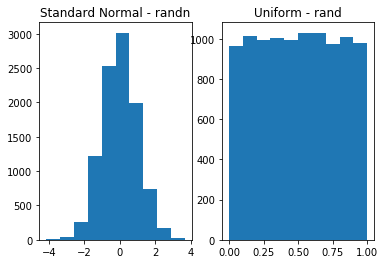

In [5]:
plt.subplot(1,2,1)
x = np.random.randn(10000)
plt.title("Standard Normal - randn")
plt.hist(x)
plt.subplot(1,2,2)
x = np.random.rand(10000)
plt.title("Uniform - rand")
plt.hist(x)

To shift the distribution from standard normal  to n N(m,sd<sup>2</sup>) use the transformation m + sd * np.random.rand()

outputs random numbers from N(2, 9) 

this shifts the plot left to centre it round 2 with a spread of 9


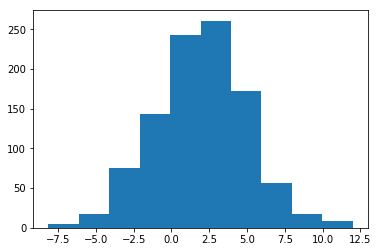

In [6]:
print("outputs random numbers from N(2, 9)","\n")
plt.hist(2+3*np.random.randn(1000))
print("this shifts the plot left to centre it round 2 with a spread of 9")

### randint

randint((low`[, high, size, dtype]`))outputs random integers from low (inclusive) to high (exclusive). 
randint is differs from the two above functions in that it returns integers within a specifeid interval low (inclusive) to high (exclusive). Integers are returned from the discrete uniform distribution [ref](). Whereas rand returned numbers from the continous uniform distribution between `[0,1)`. Randint expands this interval by returing values from `[low,high)`. If no arguments are given an error is returned. If one argument is given, say h then this is assumed to be the higher bound and positive and the lower bound is 0 `[0, h)`.  Size can also be specified e.g. if 10 random numbers are required between `[0, 5)` the arguments would be (0,5,10). Data type can also be specified, the default is np.int. dTypes relate to the way memory blocks are interpreted [ref](https://stackoverflow.com/questions/9457037/what-does-dtype-do).   

#### When would you use randint?
randint would be used when integers rather than floats are required and the integers lie within a certain range. e.g. generate a random number between 1 and 10 inclusive

In [7]:
print("Generate a random number between 1 and 10 inclusive","\n")
print(np.random.randint(1, 11),"\n")

print("Generate 3 random number between 1 and 10 inclusive","\n")
print(np.random.randint(1, 11, 3),"\n")

print("Generate a random positive number less than 4","\n")
print(np.random.randint(4),"\n")

print("Generate a random integer between -5 and 5 inclusive ","\n")
print(np.random.randint(-5, 6),"\n")

Generate a random number between 1 and 10 inclusive 

1 

Generate 3 random number between 1 and 10 inclusive 

[6 4 4] 

Generate a random positive number less than 4 

2 

Generate a random integer between -5 and 5 inclusive  

3 



### random_integers

random_integers(low`[, high, size]`) outputs random integers of type np.int between low and high, inclusive. Size refers to the number of random values required from the specified interval. This function is no longer maintained. 

Random_integers is very similar to randint, both return integers from a discrete uniform distribution. However random_integers is inclusive of the higher range value `[low, high]`. This function is deprecated i.e replaced, in favour of randint. Thus when called by python a warning will display, although the function will still work. Both randint and random_integers can use the transformation  a + (b - a) * (np.random.random_integers(N) - 1) / (N - 1) to give N evenly spaced integers between a and b but random_integers includes the b value whereas randind does not.

#### When would you use random_integers?
You wouldn't. The function is retired in favour of randint which was discussed above. It will still work but python will give a warning when its used.  

In [8]:
print("Output 10 1's or 0's randomly", "\n")
print(np.random.random_integers(0,1, 10), '\n')


Output 10 1's or 0's randomly 

[0 0 1 0 1 1 1 0 0 0] 



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  


To specify intervals equally spaced..... ## add stuff here

a,b,N=3,5,10
print(a + (b - a) * (np.random.random_integers(N) - 1) / (N - 1), '\n')
print(a + (b - a) * (np.random.randint(N) - 1) / (N - 1))

### random_sample (random, ranf and sample)

random_sample(`[size]`) outputs random floats in the half-open interval `[0.0, 1.0)` [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).
Random_sample and its aliases [ref](https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions) random [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random.html#numpy.random.random), ranf [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.ranf.html#numpy.random.ranf) and sample [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.sample.html#numpy.random.sample) . unlike randint which returned random values from the descrite uniform distribution `[low, high)` and rand which populates arrays with random values in a given shape, random_sample returns random floats from the continous uniform distrubtion `[0,1)`. It's input is size i.e. the number of random values required. To expand values outside of U`[0,1)` to cover U`[a, b)` the transformation a +  (b - a)`*` random_sample() can be used. the size can be an integer or tuples of integers (a,b,c) 

#### When would you use random_sample or its aliases?
random_sample is used when random floats are required from the continous uniform distrubution in the interval 0 inclusive to 1 exclusive. Each number is as likey to be generated as every other. A single number can be returned E.g. pick any number in the interval `[0,1)` or an array of a specified size e.g. pick 20 numbers in the interval `[0, 1)` 

In [9]:
print("generate a random float in [0,1)", "\n")
print(np.random.random_sample(), "\n")

print("generate a random float in [0,1)", "\n")
print(np.random.random_sample(20), "\n")



generate a random float in [0,1) 

0.2825343994074778 

generate a random float in [0,1) 

[ 0.21891697  0.84728516  0.66800375  0.86791685  0.08953124  0.19090667
  0.82527504  0.95783803  0.49233893  0.15493254  0.90295754  0.57791857
  0.39047624  0.52890093  0.80167052  0.73436239  0.78044931  0.37232026
  0.10549208  0.86791195] 



The histogram of random_sample shows its uniform distrubution 



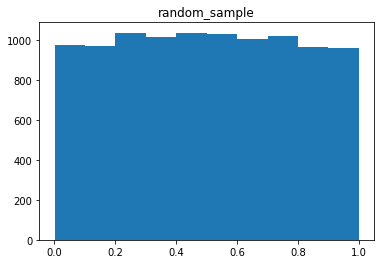

The aliases show a similar pattern 



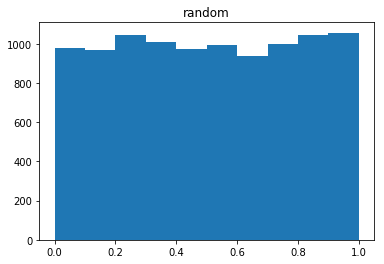

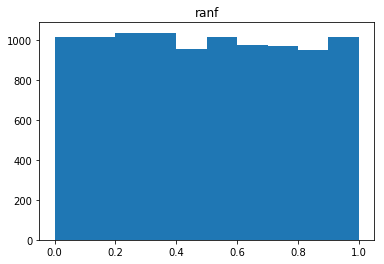

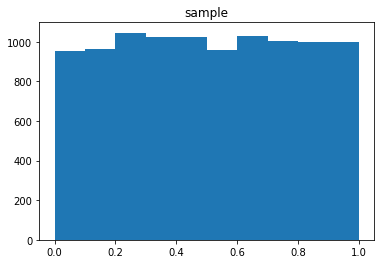

In [10]:
print("The histogram of random_sample shows its uniform distrubution", "\n")
plt.hist(np.random.random_sample(10000))
plt.title("random_sample")
plt.show()
print("The aliases show a similar pattern", "\n")
plt.hist(np.random.random(10000))
plt.title("random")
plt.show()
plt.hist(np.random.ranf(10000))
plt.title("ranf")
plt.show()
plt.hist(np.random.sample(10000))
plt.title("sample")
plt.show()



To change the interval `U[0, 1)` from which the numbers are selected to `U[a,b)` from use the transformation a + (b - a)* random_sample()



This outputs an 1x10 array filled with random floats between [3, 5) 

[ 3.26322782  4.07722073  4.74951886  4.2522682   4.23851903  4.27241938
  3.21056307  3.64706849  4.04411806  3.24035625] 



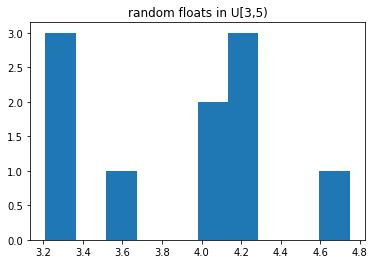

In [11]:
print("This outputs an 1x10 array filled with random floats between [3, 5)", "\n")
a,b,N=3,5,10
x = a + (b - a) * np.random.random_sample(10) 
print(x, "\n")
plt.hist(x)
plt.title("random floats in U[3,5)")
plt.show()



### choice

choice(a`[, size, replace, p]`) outputs a random sample from a given 1-D array [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). its input is a 1 dimentional array or integer. The number of random values required can be specified by size. The difference between this function and the ones above is that here the population is specified in an array and the function returns one of these choices randomly. e.g. an input of all the harry potter book titles would randomly return one book from this population. The probability p of elements in the 1 d array can be specified (probabilities total to 1). If p is not provided then p is assumed to be uniformly distruibuted across the array. Size refers to the number of random elements from the population that are returned. There is also the option to replace which defaults to true. This refers to whether or not the random choice element is returned to the sample population and is used when unique values from the population are needed [ref](https://stackoverflow.com/questions/40689152/what-does-replacement-mean-in-numpy-random-choice). 


#### When would you use choice?
choice is used when you want to generate a random choice from a fixed sample, you can specify if you want the choise to be returned to the selection pool or not. For example pick one Harry Potter book from a pool of all Harry potter books.


In [12]:
print("List all Harry Potter books", "\n")
hp = ['Harry Potter and the Philosopher’s Stone', 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Half-Blood Prince', 'Harry Potter and the Deathly Hallows']
for book in hp:
    print(book)
print("\n")
print("pick one at random", "\n")
print(np.random.choice(hp, 1), '\n')#  books can be repeatedly returned

print("pick 5 books at random and remove it from the pool when picked  - only unique books will be returned for each choice", "\n")
print(np.random.choice(hp, 5, replace=False), '\n')
# only unique books are returned
print("pick 5 books at random and keep it in the pool when picked  - choices may be repeated", "\n")
print(np.random.choice(hp, 5, replace=True), '\n')
print("Choices can be weighted to make them more or less likely", "\n")
print("Here, Chamber of secrets more likely to be selected", "\n")
print(np.random.choice(hp, 5, p=[0.2,0.5,0.1,0.1,0.015,0.03,0.055], replace=True), '\n')


List all Harry Potter books 

Harry Potter and the Philosopher’s Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallows


pick one at random 

['Harry Potter and the Chamber of Secrets'] 

pick 5 books at random and remove it from the pool when picked  - only unique books will be returned for each choice 

['Harry Potter and the Chamber of Secrets'
 'Harry Potter and the Order of the Phoenix'
 'Harry Potter and the Half-Blood Prince'
 'Harry Potter and the Goblet of Fire'
 'Harry Potter and the Prisoner of Azkaban'] 

pick 5 books at random and keep it in the pool when picked  - choices may be repeated 

['Harry Potter and the Philosopher’s Stone'
 'Harry Potter and the Deathly Hallows'
 'Harry Potter and the Goblet of Fire'
 'Harry Potter and the Prisoner of Azkaban'
 'Harry Potter and the Philosopher’

### bytes

bytes(length)outputs random bytes of the specified length size [Ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). 

bytes takes non negative integer inputs and outputs randomly byte strings. outputs are prefixed with b and the bytes are enclosed within apostrophies or quotation marks, hence outputs are strings of specified length [Ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.bytes.html#numpy.random.bytes). The b at the start indicates that it is a byte literal [why the b at the front](https://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal)

#### When would you use bytes
bytes would be used when you want to generate random byte strings

In [13]:
print(np.random.bytes(0),'\n')
print(np.random.bytes(1),'\n')
print(np.random.bytes(10),'\n')

b'' 

b'\xd0' 

b'&\xea]\x05\x8a\x14\x9a\xf9\xea`' 



Hence *Simple Random Data* contains functions for generating random elements consisting of integers, arrays, sizes and shapes from continous or discrete uniform populations or normally distributed populations that may or may not be probabilistically weighted towards some values depending on what is required. It also contains functions to randomly pick elements from a given population array such as a list or set of bytes. The next section of numpy.random to be discussed is its permutation functions. 

## What does permutations do?

A permutation is a way of cycling through all options in a given set. For example chosing unique pairs of 3 numbers (1,2 and 3)would give 3<sup>2</sup> combinations namely (1,1)(1,2)(1,3)(2,1)(2,2)(2,3)(3,1) (3,2) (3,3). Numpy.random has two permutation functions namely [Ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html), 
- shuffle
- permutation

### shuffle
shuffle(x) takes an array or array like input and randomly reorders elements in the array. E.g. randomly shuffling the order of harry potter books
 

## What are distributions and why do we need them.


## What are seeds and how are they involved in generating pseudorandom numbers. 